In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ds=pd.read_csv('ds_salaries.csv')
ds.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
ds=ds.drop('Unnamed: 0',axis=1)

In [ ]:
ds.shape

(607, 11)

In [ ]:
ds.work_year.value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

Data is more focused on Full time Roles in the year 2022

In [ ]:
ds.employment_type.value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [ ]:
ds.loc[ds.employment_type=='CT']

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
28,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
78,2021,MI,CT,ML Engineer,270000,USD,270000,US,100,US,L
225,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
283,2021,SE,CT,Staff Data Scientist,105000,USD,105000,US,100,US,M
489,2022,EN,CT,Applied Machine Learning Scientist,29000,EUR,31875,TN,100,CZ,M


In [ ]:
ds.loc[ds.employment_type=='FL']

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
54,2020,SE,FL,Computer Vision Engineer,60000,USD,60000,RU,100,US,S
184,2021,MI,FL,Machine Learning Scientist,12000,USD,12000,PK,50,PK,M
208,2021,MI,FL,Data Engineer,20000,USD,20000,IT,0,US,L
488,2022,MI,FL,Data Scientist,100000,USD,100000,CA,100,US,M


In [ ]:
ds.groupby('employment_type').salary_in_usd.sum()

employment_type
CT      922875
FL      192000
FT    66719227
PT      330705
Name: salary_in_usd, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9114c84b10>,
      dtype=object)

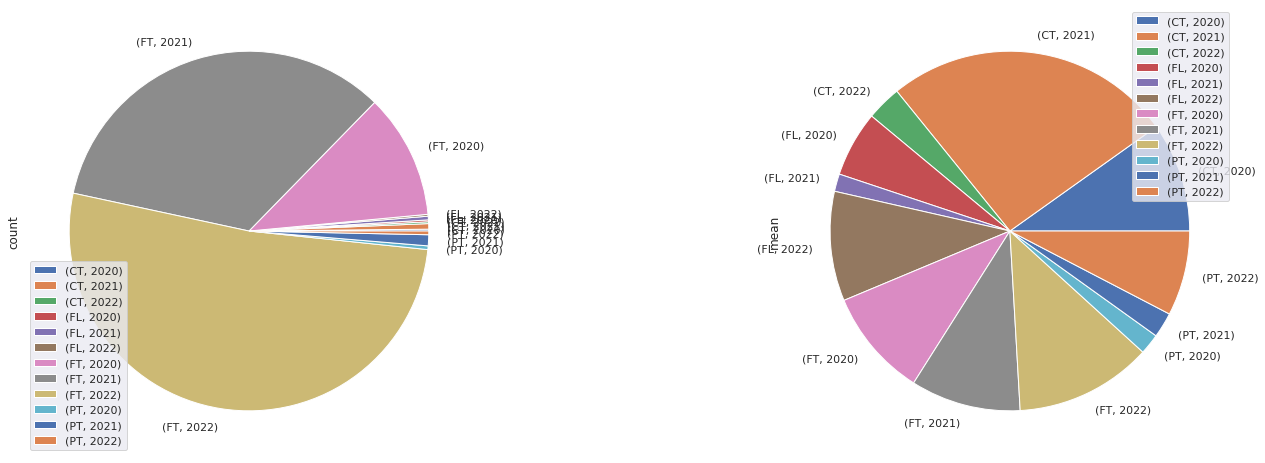

In [ ]:
ds.groupby(['employment_type','work_year']).salary_in_usd.agg(['count','mean']).plot(kind='pie',subplots=True)

In [ ]:
ds.remote_ratio.value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

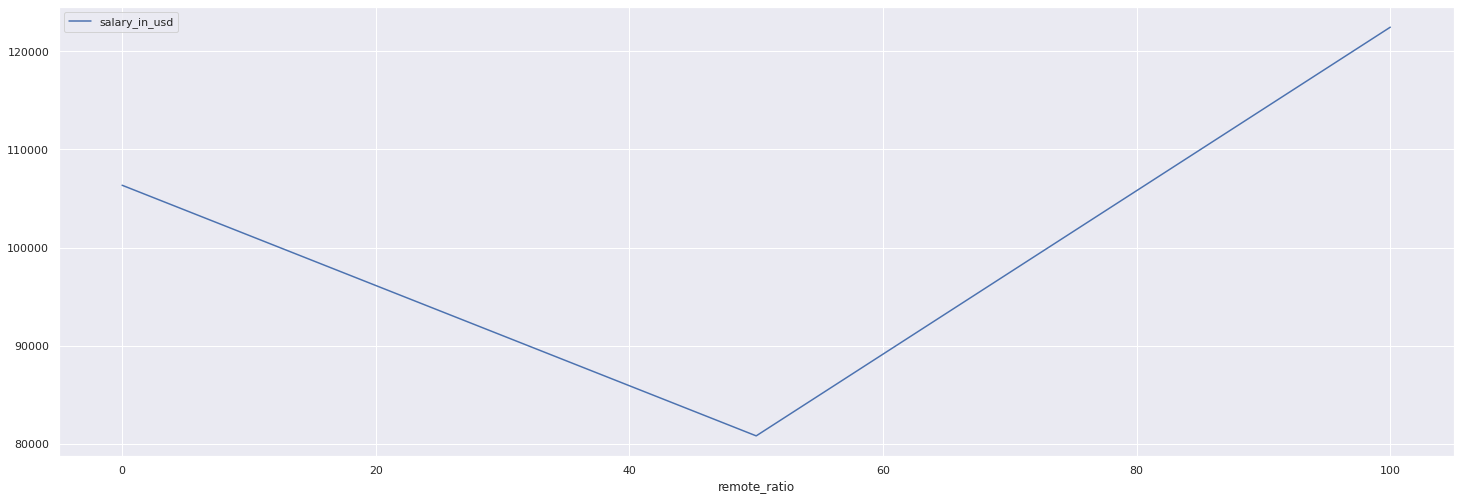

In [ ]:
ds.groupby('remote_ratio').salary_in_usd.mean().plot(legend=True)

In [ ]:
ds.experience_level.value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

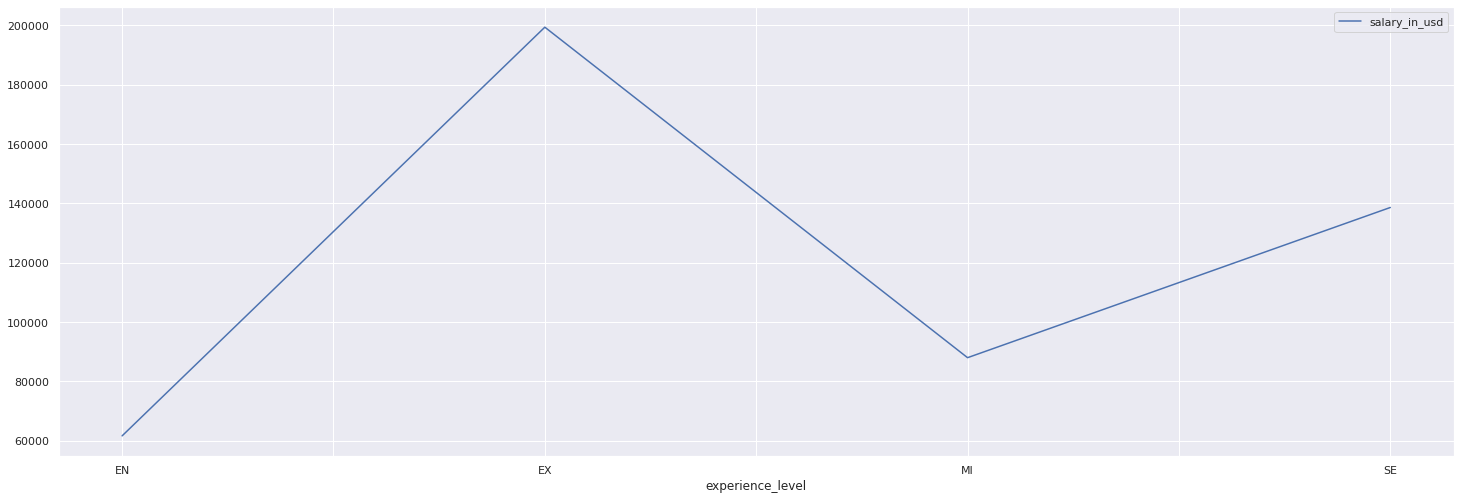

In [ ]:
ds.groupby('experience_level').salary_in_usd.mean().plot(legend=True)

In [ ]:
result=ds.groupby('job_title').salary_in_usd.mean().sort_values(ascending=False)[:10]

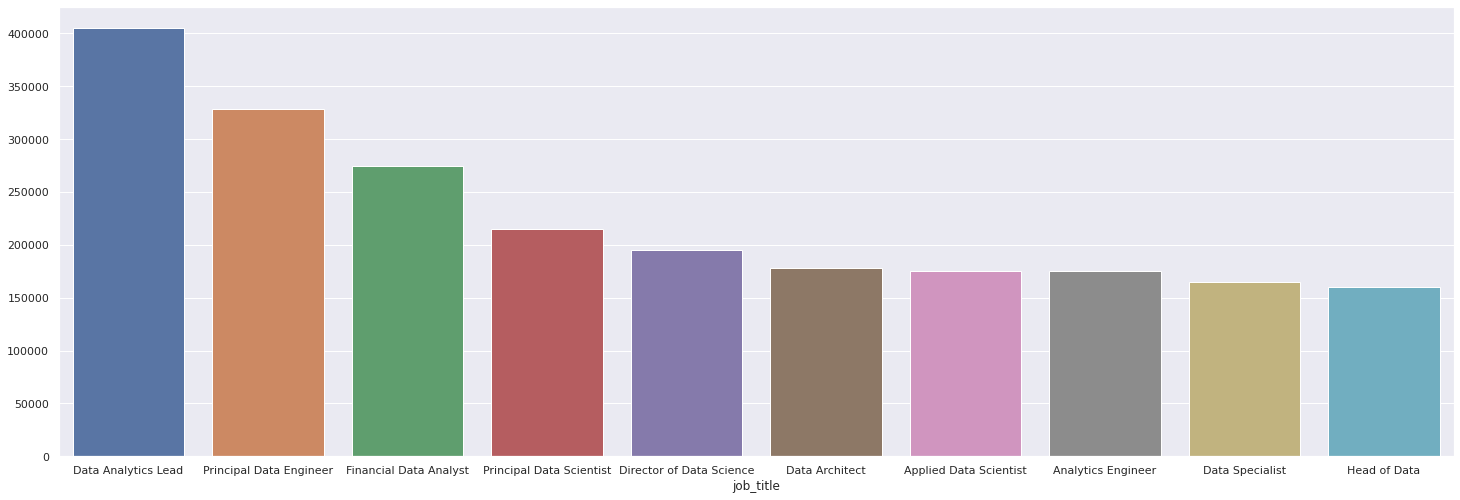

In [ ]:
sns.set(rc={'figure.figsize':(25,8.27)})
sns.barplot(x=result.index, y= result.values)

In [ ]:
ds.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


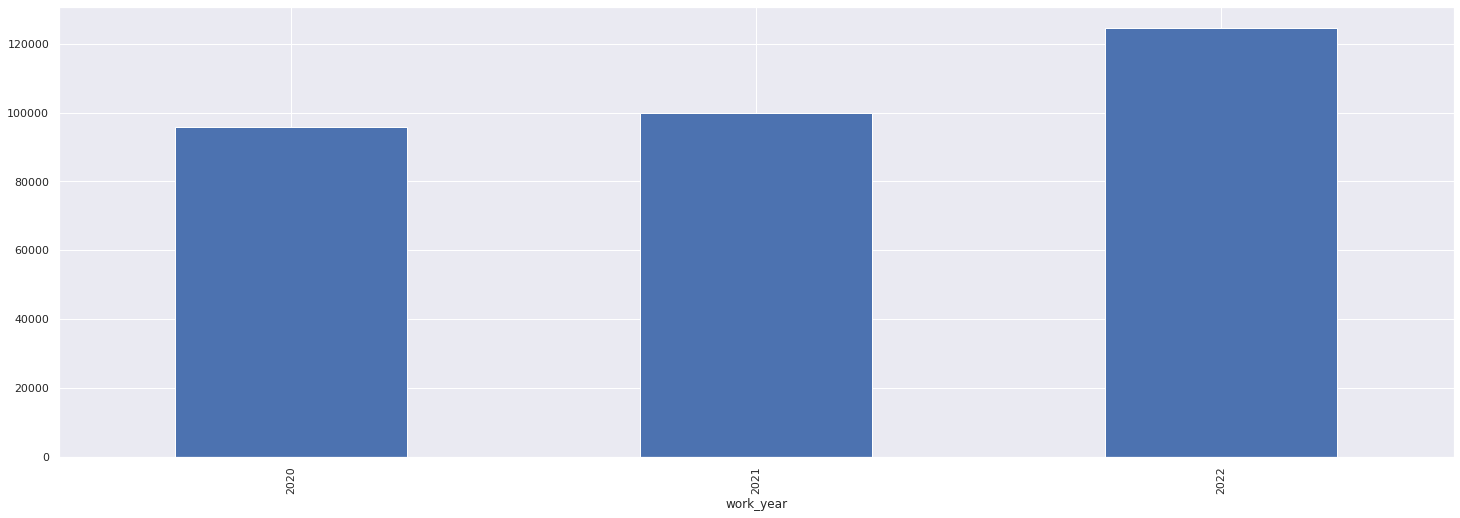

In [ ]:
ds.groupby('work_year').salary_in_usd.mean().plot(kind='bar')

The Bigger the size of the company the more money it gives to its employees

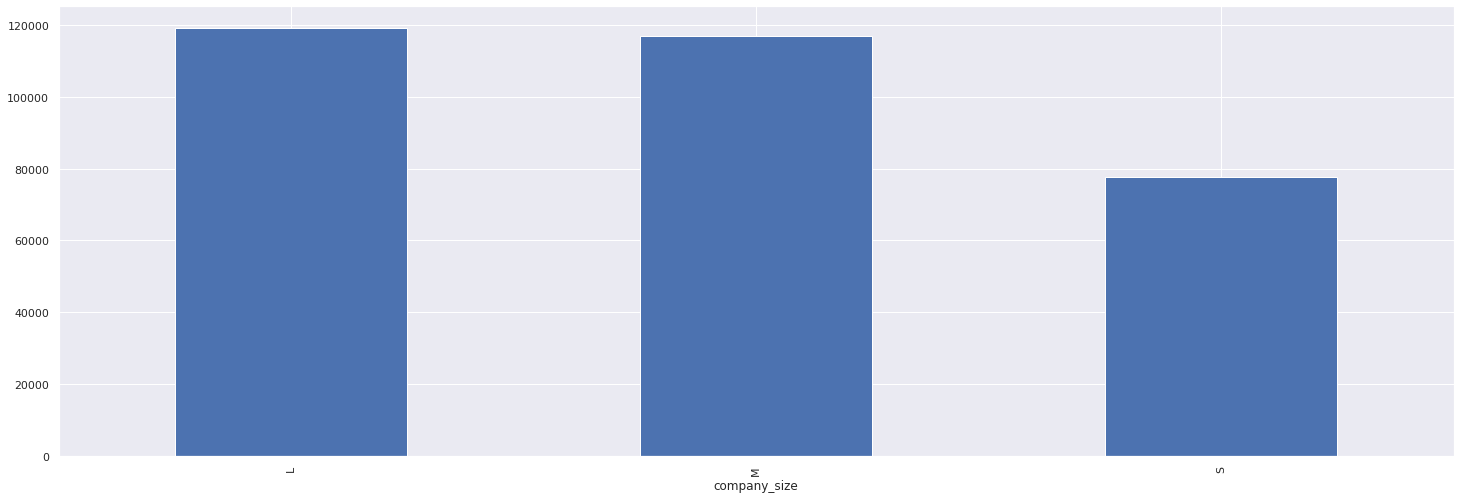

In [ ]:
ds.groupby('company_size').salary_in_usd.mean().plot(kind='bar')

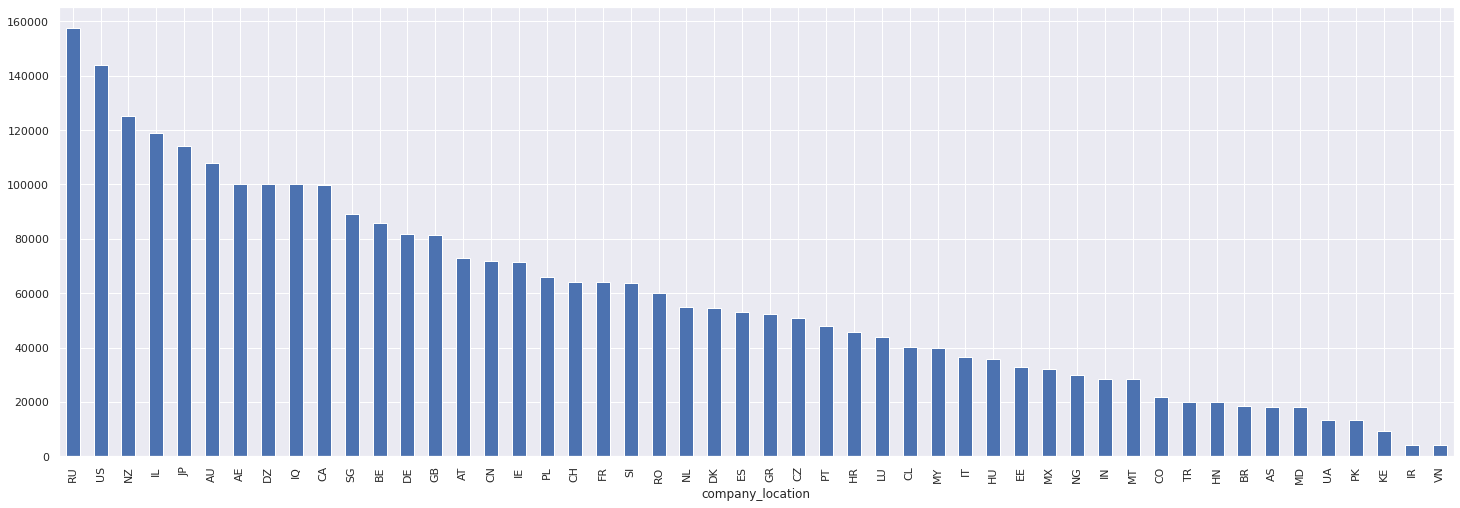

In [ ]:
ds.groupby('company_location').salary_in_usd.mean().sort_values(ascending=False).plot(kind='bar')

In [ ]:
ds.groupby(['company_location','remote_ratio']).salary_in_usd.mean().sort_values(ascending=False) 

company_location  remote_ratio
RU                50              230000.000000
JP                0               214000.000000
US                100             146624.240602
                  0               137825.811594
                  50              131379.450000
                                      ...      
TR                0                12103.000000
PK                50               10000.000000
KE                100               9272.000000
IR                100               4000.000000
VN                0                 4000.000000
Name: salary_in_usd, Length: 84, dtype: float64

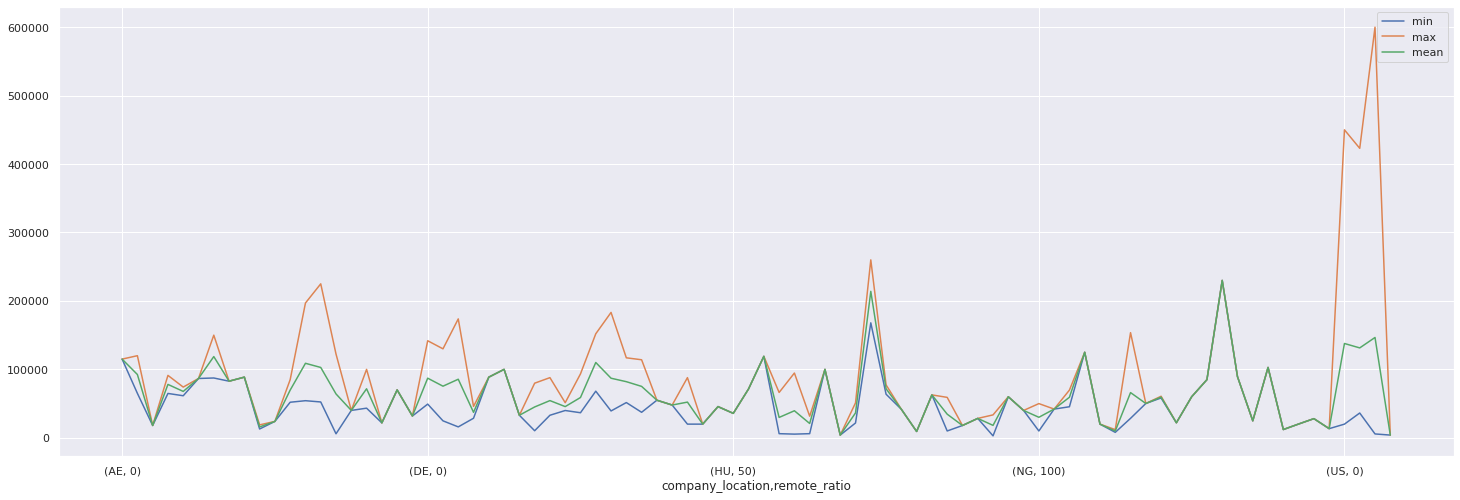

In [ ]:
ds.groupby(['company_location','remote_ratio']).salary_in_usd.aggregate(['min','max','mean']).plot()

In [ ]:
ds_high=ds.loc[ds['salary_in_usd'] > 200000]

In [ ]:
ds_high.experience_level.value_counts()

SE    36
EX    10
MI     6
EN     2
Name: experience_level, dtype: int64

In [ ]:
ds_high.loc[ds_high['experience_level']=='EN']

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
37,2020,EN,FT,Machine Learning Engineer,250000,USD,250000,US,50,US,L
115,2021,EN,FT,Machine Learning Scientist,225000,USD,225000,US,100,US,L


In [ ]:
ds_high.company_size.value_counts()

M    28
L    23
S     3
Name: company_size, dtype: int64

In [ ]:
ds_high.sort_values(by='salary_in_usd',ascending=False)[:10]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
252,2021,EX,FT,Principal Data Engineer,600000,USD,600000,US,100,US,L
97,2021,MI,FT,Financial Data Analyst,450000,USD,450000,US,100,US,L
33,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
157,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
225,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
63,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
523,2022,SE,FT,Data Analytics Lead,405000,USD,405000,US,100,US,L
519,2022,SE,FT,Applied Data Scientist,380000,USD,380000,US,100,US,L
25,2020,EX,FT,Director of Data Science,325000,USD,325000,US,100,US,L
482,2022,EX,FT,Data Engineer,324000,USD,324000,US,100,US,M


In [ ]:





-